In [1]:
import numpy as np
import pickle
import dimer_stages as stages_dim
import matplotlib.pyplot as plt

In [2]:
import dimer_stages_myte_config as config

sim_list = config.sim_list


pstates_infty_full = []
pstates_infty_mcsolve = []
thetas_gutz = []
prob_infty_gutz = []
for sim in sim_list:
    f = open(f"data/dimer-myte-lmbd_1={sim.lmbd_1:.1f}-lmbd_2={sim.lmbd_2:.1f}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}.pkl", "rb")
    data_full = pickle.load(f)
    f.close()

    f = open(f"data/dimer-check-lmbd_1={sim.lmbd_1:.1f}-lmbd_2={sim.lmbd_2:.1f}-Nt={sim.Nt}-T=100-dt=0.01.pkl", "rb")
    # f = open(f"data/dimer-myte-lmbd_1={sim.lmbd_1:.1f}-lmbd_2={sim.lmbd_2:.1f}-Nt={sim.Nt}-T={sim.T}-dt=0.01.pkl", "rb")
    data_mcsolve = pickle.load(f)
    f.close()

    f = open(f"data/gutzwiller-analytical-lambda={sim.lmbd_2}.pkl", "rb")
    data_gutz = pickle.load(f)
    f.close()

    def flatten(L):
        return [i for l in L for i in l]
    
    states_full = flatten(data_full[1])
    # states_infty_full = data_full[1].flatten()
    pstates = []
    for state in states_full:
    # for state in data_full[1].states.flatten():
        pstates.append(state.ptrace(0))
        
    pstates_infty_full.append(pstates)

    # states_mcsolve = flatten(data_mcsolve[1])
    # # states_infty_full = data_full[1].flatten()
    # pstates = []
    # for state in states_mcsolve:
    # # for state in data_full[1].states.flatten():
    #     pstates.append(state.ptrace(0))
        
    # pstates_infty_mcsolve.append(pstates)

    pstates_mcsolve = []
    for state_mcsolve in data_mcsolve[1].states.flatten():
        pstates_mcsolve.append(state_mcsolve.ptrace(0))

    pstates_infty_mcsolve.append(pstates_mcsolve)

    thetas_gutz.append(data_gutz[1])
    prob_infty_gutz.append(data_gutz[2])

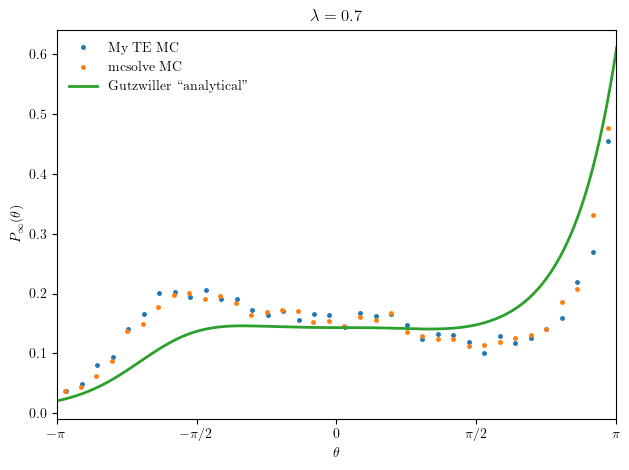

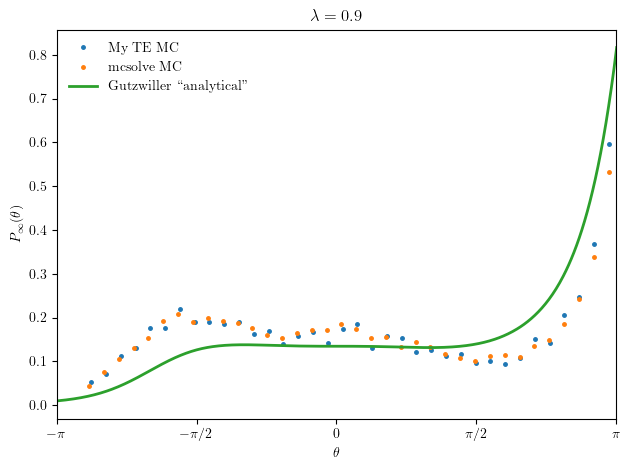

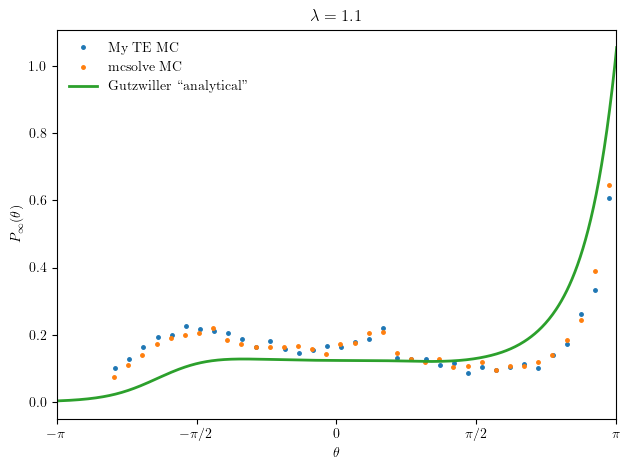

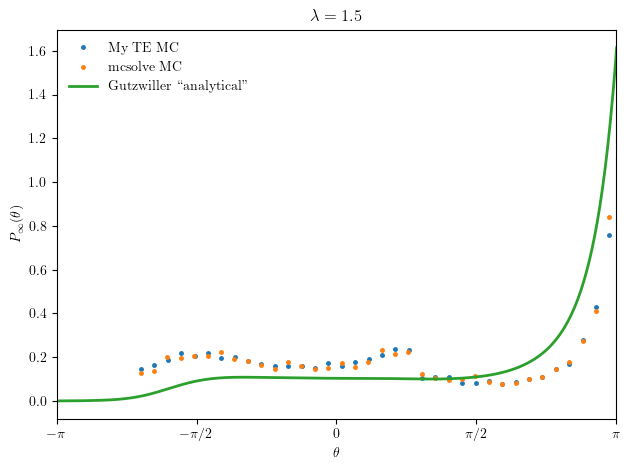

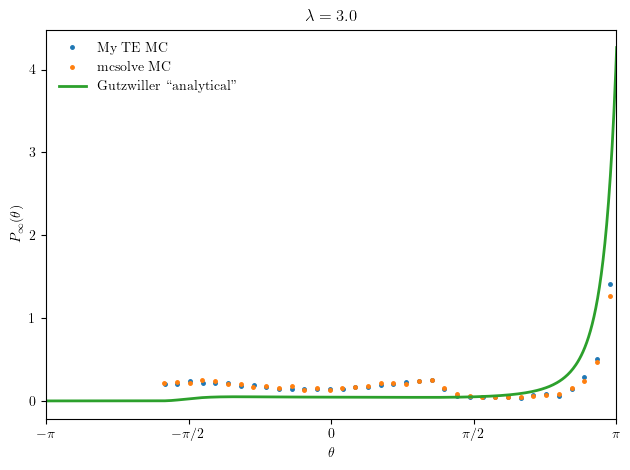

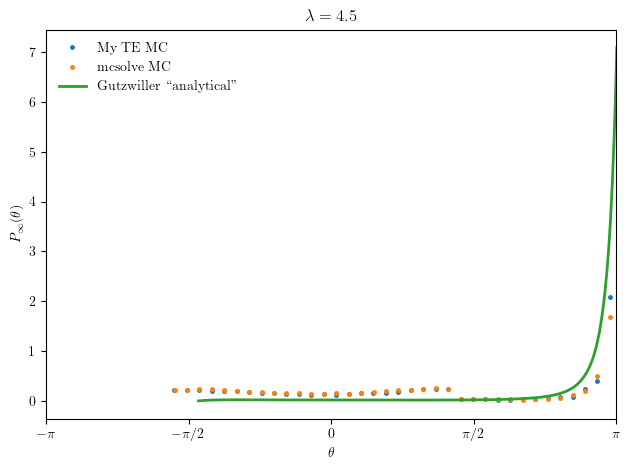

In [3]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for i, sim in enumerate(sim_list):
    plt.figure()

    N_bins = 36

    thetas_full = []
    for pstate_full in pstates_infty_full[i]:
        thetas_full.append(stages_dim.state_to_theta(pstate_full))

    thetas_mcsolve = []
    for pstate_mcsolve in pstates_infty_mcsolve[i]:
        thetas_mcsolve.append(stages_dim.state_to_theta(pstate_mcsolve))

    counts_full, bins_full = np.histogram(thetas_full, N_bins)
    bin_width_full = bins_full[1] - bins_full[0]
    freqs_full = counts_full / np.sum(counts_full) / bin_width_full

    counts_mcsolve, bins_mcsolve = np.histogram(thetas_mcsolve, N_bins)
    bin_width_mcsolve = bins_mcsolve[1] - bins_mcsolve[0]
    freqs_mcsolve = counts_mcsolve / np.sum(counts_mcsolve) / bin_width_mcsolve


    plt.plot(bins_full[:-1] + bin_width_full/2, freqs_full, ".", label=rf"My TE MC")
    plt.plot(bins_mcsolve[:-1] + bin_width_mcsolve/2, freqs_mcsolve, ".", label=rf"mcsolve MC")
    plt.plot(thetas_gutz[i], prob_infty_gutz[i], label="Gutzwiller ``analytical''")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend(loc="upper left")
    plt.title(rf"$\lambda = {sim.lmbd_2}$")

    plt.tight_layout()

    plt.savefig(f"plots/20240430/gutzwiller-vs-full-lambda_2={sim.lmbd_2}.pdf")